# Linear regression

回归算法：

$$z = \left[\theta_0, \theta_1, \theta_2, ..., \theta_n\right]\left[\begin{matrix}x_0\cr x_1\cr x_2\cr ...\cr x_n\cr\end{matrix}\right] = \theta^T x \quad(x_0 = 1)$$

通过函数 z，线性回归使用输入的特征矩阵X来输出一组连续型的标签值 y_pred，如果标签是离散型变量，尤其是，如果是满足 0-1 分布的离散型,可以引入 Sigmoid 函数,他将所有结果映射到 0～1 之间

$$g(z) = \frac{1}{1+e^{-z}}$$

将 z 带入：

$$g(x) = y(x)= \frac{1}{1+e^{-\theta^Tx}}$$

$y(x)$ 就是逻辑回归返回的标签值。此时,$g(x)$ 的取值都在[0,1]之间，因此 $y(x)$ 和 $1-y(x)$ 相加必然为1。如果我们令 $y(x)$ 除以   $1-y(x)$ 可以得到形似几率(odds)的 $\frac{y(x)}{1-y(x)}$，在此基础上取对数，可以很容易就得到:

$$
\begin{align}
\ln\frac{y(x)}{1-y(x)} &= \ln\frac{\frac{1}{1+e^{-\theta^Tx}}}{1 -\frac{1}{1+e^{-\theta^Tx}}} \\
&= \ln\frac{\frac{1}{1+e^{-\theta^Tx}}}{\frac{e^{-\theta^Tx}}{1+e^{-\theta^Tx}}}\\
&= \ln\frac{1}{e^{-\theta^Tx}}\\
&= \ln{e^{\theta^Tx}}\\
&= \theta^Tx
\end{align}
$$

y(x)的形似几率取对数的本质其实就是我们的线性回归z，我们实际上是在对线性回归模型的预测结果取 对数几率来让其的结果无限逼近0和1。因此，其对应的模型被称为”对数几率回归“(logistic Regression)，也就是我们的逻辑回归

### 损失函数

$$J(\theta) = -\sum_{i=1}^{m}{(y_i * \log{(y_\theta(x_i))} + (1-y_i) * \log{(y_\theta(x_i)}))}$$

### 正则化
#### L1
通过在损失函数后面加上每个参数向量中的每个参数的绝对值之和来做惩罚项

$$J(\theta)_{L1} = C*J(\theta) + \sum_{j=1}^{n}{|\theta_j|} \quad (j \ge 1)$$

#### L2
参数向量中的每个参数的平方和

$$J(\theta)_{L2} = C*J(\theta) + {\sum_{j=1}^{n}{(\theta_j)^2}} \quad (j \ge 1)$$

### 线性回归模型

In [20]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

参数：
- penalty 取 l1 或者 l2,来指定正则化方式，当为 l1 时只能用”liblinear"和"saga“方式计算，**其中 l1 会让参数变为零，变稀疏，而 l2 则不会变为零，只会让参数变得更小**
- C 正则化强度倒数，C 越小模型对损失函数的惩罚越重，正则化能力越强，参数 $\theta$ 会被压缩得越来越小
- max_iter 最大迭代次数，越大，步长就越小

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [5]:
lrl1 = LR(penalty='l1', solver='liblinear', C=0.5, max_iter=1000)
lrl2 = LR(penalty='l2', solver='liblinear', C=0.5, max_iter=1000)

lrl1.fit(X,y)
lrl1.coef_

array([[ 4.01869478,  0.03225763, -0.13971882, -0.01623724,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50535857,  0.        , -0.07127556,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.2462143 , -0.1287626 , -0.01439549,  0.        ,
         0.        , -2.02277588,  0.        ,  0.        ,  0.        ]])

In [6]:
lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61520498e+00,  1.03165077e-01,  4.89949912e-02,
        -4.54501839e-03, -9.48008442e-02, -3.01421091e-01,
        -4.56859977e-01, -2.23258644e-01, -1.36553775e-01,
        -1.93906452e-02,  1.51863698e-02,  8.84898768e-01,
         1.16165402e-01, -9.44763010e-02, -9.89655843e-03,
        -2.29725881e-02, -5.65958129e-02, -2.71050978e-02,
        -2.78528014e-02,  3.23039398e-04,  1.25588920e+00,
        -3.02228846e-01, -1.72470625e-01, -2.21057469e-02,
        -1.74443731e-01, -8.78235976e-01, -1.16396035e+00,
        -4.29422429e-01, -4.23200446e-01, -8.69294093e-02]])

可以看到 l1 正则后许多特征都被筛选掉了，因为参数已经变为零，而 l2 正则化后参数仍然保留，虽然参数权重很小

#### 画出 C 的学习曲线

In [23]:
l1 = []
l2 = []
l1t = []
l2t = []
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=25)
for i in np.linspace(0.05,3,19):
    lrl1 = LR(penalty='l1', solver='liblinear', C=i, max_iter=1000)
    lrl2 = LR(penalty='l2', solver='liblinear', C=i, max_iter=1000)

    lrl1.fit(X_train,Y_train)
    lrl2.fit(X_train,Y_train)
    l1.append(accuracy_score(lrl1.predict(X_train), Y_train))
    l2.append(accuracy_score(lrl2.predict(X_train), Y_train))
    l1t.append(accuracy_score(lrl1.predict(X_test), Y_test))
    l2t.append(accuracy_score(lrl2.predict(X_test), Y_test))

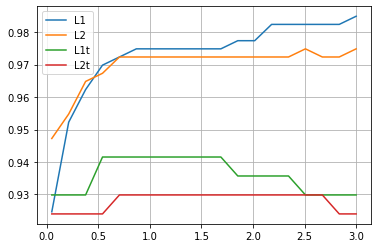

In [24]:
plt.figure()
label = ["L1","L2","L1t","L2t"]
y_ = [l1,l2,l1t,l2t]
for i in range(4):
    plt.plot(np.linspace(0.05,3,19), y_[i], label=label[i])
plt.grid();plt.legend()
plt.show()

#### 用嵌入法选择特征

In [19]:
lr_1 = LR(solver='liblinear', C=0.8, random_state=50)
cross_val_score(lr_1, X, y, cv=10).mean()

0.9508145363408522

In [21]:
x_embedded = SelectFromModel(lr_1,norm_order=1).fit_transform(X, y)
x_embedded.shape

(569, 9)

In [22]:
cross_val_score(lr_1, x_embedded, y, cv=10).mean()

0.9368107769423559

max_iter 参数

In [27]:
score = []
score_t = []

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=25)
for i in np.arange(1,201,20):
    lrl1 = LR(penalty='l1', solver='liblinear', C=0.8, max_iter=i)
    lrl1.fit(X_train,Y_train)
    
    score.append(accuracy_score(lrl1.predict(X_train), Y_train))
    score_t.append(accuracy_score(lrl1.predict(X_test), Y_test))


/Users/qi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

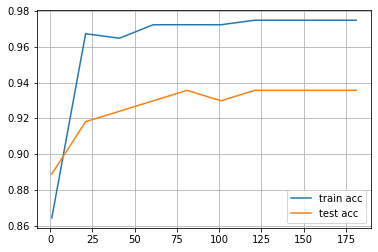

In [28]:
plt.figure()
label = ["train acc","test acc"]
y_ = [score, score_t]
for i in range(2):
    plt.plot(np.arange(1,201,20), y_[i], label=label[i])
plt.grid();plt.legend()
plt.show()

虽然设定的是迭代到200次，但是很明显没有到200，上面的红框提示就是模型达到设定的最大迭代次数后，没有收敛的提示

In [30]:
lrl1.n_iter_

array([125], dtype=int32)

#### 二元回归和多元回归
- multi_class: 
 * ovr 二分类问题、或者让模型采用一对多的方式处理一对多的问题。
 * multinomial 多分类问题
 * auto 根据输入标签自动选择
- solver: 求解器
 * newton-cg 拟牛顿法的一种，利用损失函数二阶导数矩阵(海森矩阵)来迭代优化参数 只支持 L2
 * lbfgs 拟牛顿法的一种，利用损失函数二阶导数矩阵(海森矩阵)来迭代优化参数 只支持 L2
 * liblinear 坐标下降法，可用 L1、L2 正则，二分类专用 会惩罚截距
 * sag 随机平均梯度下降，每次只用一部分样本计算梯度，只支持 L2
 * saga 随机平均梯度下降的优化，可以处理稀疏矩阵，支持 L1、L2

以鸢尾花数据集为例，查看二分类和多分类的不同

In [32]:
from sklearn.datasets import load_iris

In [33]:
flowers = load_iris()

In [39]:
class_ = ['ovr', 'multinomial']
for c in class_:
    lr = LR(multi_class=c, max_iter=500, random_state=20, solver='sag').fit(flowers.data, flowers.target)
    print('train score : %.3f (%s)' % (lr.score(flowers.data, flowers.target), c))

train score : 0.960 (ovr)
train score : 0.987 (multinomial)


/Users/qi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/qi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### 样本不平衡参数
- class_weight 给少量的标签更大的权重，默认None，即权重1:1，当误分代价很高时，使用 balance 模式， 但是处理样本不均衡一般不用此方法，用**采样法**，上采样：扩充少数类，SMOTE